In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
# IGNORE THE WARNING

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


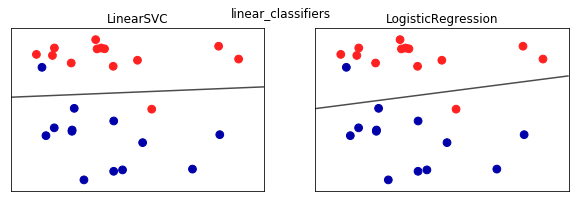

In [7]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) 
plt.suptitle("linear_classifiers")
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):    
    clf = model.fit(X, y)    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)    
    ax.set_title("%s" % clf.__class__.__name__)

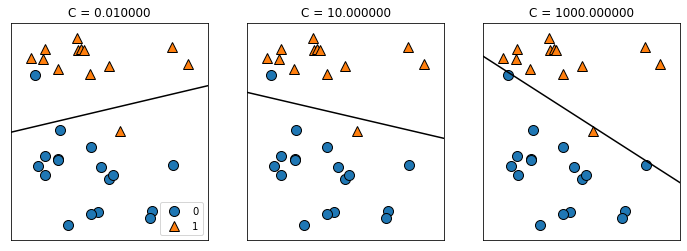

In [8]:
mglearn.plots.plot_linear_svc_regularization()

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(    cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
logisticregression = LogisticRegression().fit(X_train, y_train) 
print("training set score: %f" % logisticregression.score(X_train, y_train)) 
print("test set score: %f" % logisticregression.score(X_test, y_test))


training set score: 0.955399
test set score: 0.958042


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
logisticregression100=LogisticRegression(C=100).fit(X_train,y_train)
print("training set score:%f"% logisticregression100.score(X_train,y_train))
print("test set score:%f"% logisticregression100.score(X_test,y_test))

training set score:0.971831
test set score:0.965035


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
logisticregression001=LogisticRegression(C=0.01).fit(X_train,y_train)
print("training set score:%f"% logisticregression001.score(X_train,y_train))
print("test set score:%f"% logisticregression001.score(X_test,y_test))

training set score:0.934272
test set score:0.930070


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


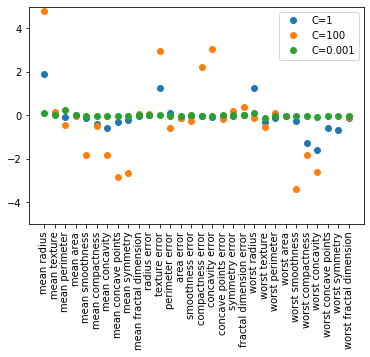

In [17]:
plt.plot(logisticregression.coef_.T, 'o', label="C=1") 
plt.plot(logisticregression100.coef_.T, 'o', label="C=100") 
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001") 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5) 
plt.legend()


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training accurracy of l1 logreg with C=0.001000:0.913146
test accuracy of l1 logreg with C=0.001000:0.923077
training accurracy of l1 logreg with C=1.000000:0.960094
test accuracy of l1 logreg with C=1.000000:0.958042


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training accurracy of l1 logreg with C=100.000000:0.985915
test accuracy of l1 logreg with C=100.000000:0.979021


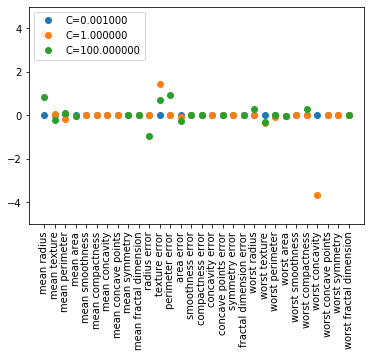

In [18]:
for C in [0.001,1,100]:
    lr_l1=LogisticRegression(C=C,penalty="l1").fit(X_train,y_train)
    print("training accurracy of l1 logreg with C=%f:%f" %(C,lr_l1.score(X_train,y_train)))
    print("test accuracy of l1 logreg with C=%f:%f" %(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,'o',label="C=%f"%C)
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.ylim(-5,5)
plt.legend(loc=2)   